In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree`b

In [26]:
from sklearn.externals.six import StringIO
import pydot
import pydotplus

In [16]:
dot_data = StringIO()

In [4]:
# Parameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

In [5]:
# Load data
iris = load_iris()


enumerate() 函数用于将一个可遍历的数据对象(如列表、元组或字符串)组合为一个索引序列，  
同时列出数据和数据下标，一般用在 for 循环当中。  
Python 2.3. 以上版本可用，2.6 添加 start 参数。  

In [6]:
# >>>seasons = ['Spring', 'Summer', 'Fall', 'Winter']
# >>> list(enumerate(seasons))
# [(0, 'Spring'), (1, 'Summer'), (2, 'Fall'), (3, 'Winter')]
# >>> list(enumerate(seasons, start=1))       # 下标从 1 开始
# [(1, 'Spring'), (2, 'Summer'), (3, 'Fall'), (4, 'Winter')]

In [7]:
for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    print(pairidx,pair)

0 [0, 1]
1 [0, 2]
2 [0, 3]
3 [1, 2]
4 [1, 3]
5 [2, 3]


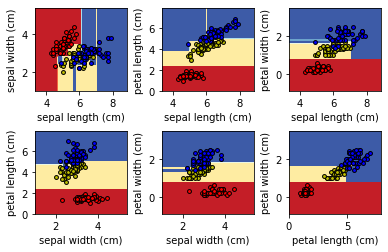

In [9]:
for pairidx, pair in enumerate([[0,1],[0,2],[0,3],
                               [1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    clf = DecisionTreeClassifier().fit(X,y)
    
    plt.subplot(2, 3, pairidx +1)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() +1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max , plot_step))
#     numpy.meshgrid()——生成网格点坐标矩阵
#     语法：X,Y = numpy.meshgrid(x, y)
#     输入的x，y，就是网格点的横纵坐标列向量（非矩阵）
#     输出的X，Y，就是坐标矩阵。

#  np.arange()函数返回一个有终点和起点的固定步长的排列，是numpy.adarray() 如[1,2,3,4,5]，起点是1，终点是5，步长为1。 
# 参数个数情况： np.arange()函数分为一个参数，两个参数，三个参数三种情况 
#  1）一个参数时，参数值为终点，起点取默认值0，步长取默认值1。 
#  2）两个参数时，第一个参数为起点，第二个参数为终点，步长取默认值1。 
#  3）三个参数时，第一个参数为起点，第二个参数为终点，第三个参数为步长。其中步长支持小数。

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
#     tight_layout会自动调整子图参数，使之填充整个图像区域。
#     这是个实验特性，可能在一些情况下不工作。它仅仅检查坐标轴标签、刻度标签以及标题的部分。

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap = plt.cm.RdYlBu)
    
# np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
# np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

# 这段代码中ravel函数将多维数组降为一维，仍返回array数组，元素以列排列。默认行序优先
# 之后调用np.c_[]将xx.ravel()得到的列后增加以列yy.ravel()。
# 这时每行元素变为了
# [[x1,y1];[x2,y2],……]
# 这里的xx，yy使用np.meshgrid得到的坐标轴，所以上面那段代码实际上执行了对坐标轴上所有位置的[x, y]的预测。

# reshape()函数得出的数组与原数组使用的是同一个存储空间，改变一个，另一个也随之改变。

# 是来绘制等高线的，contour和contourf都是画三维等高线图的，
# 不同点在于contour() 是绘制轮廓线，contourf()会填充轮廓。
# 输入的参数是x,y对应的网格数据以及此网格对应的高度值z,
# matplotlib.cm是matplotlib库中内置的色彩映射函数,matplotlib.cm.[色彩]('[数据集]'),即对[数据集]应用[色彩]其中cmap代表为color map

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    
    # Plot the training points
    for i , color in zip(range(n_classes), plot_colors):
#         zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# >>>a = [1,2,3]
# >>> b = [4,5,6]
# >>> zipped = zip(a,b)     # 打包为元组的列表
# [(1, 4), (2, 5), (3, 6)]
        idx = np.where(y == i)
#     np.where找到n维数组中特定数值的索引
        plt.scatter(X[idx, 0], X[idx, 1], c = color, label = iris.target_names[i],
                   cmap = plt.cm.RdYlBu, edgecolor = 'black',s =15)
    
    

No handles with labels found to put in legend.


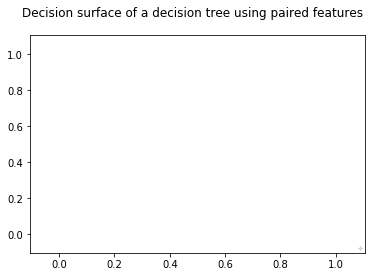

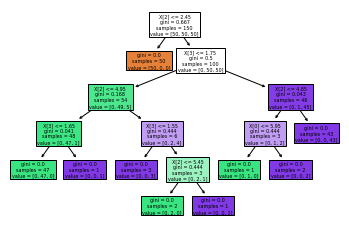

In [30]:
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc = 'lower right', borderpad = 0, handletextpad = 0)
plt.axis('tight')
plt.savefig('decision_surface.png')

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf,filled = True)

plt.show()

In [28]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data,feature_names=iris.feature_names,
                     filled=True,rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("IrisTree.pdf")
print('Visible tree plot saved as pdf.')


Visible tree plot saved as pdf.
